# Matrix generation

## Init symbols for *sympy*

In [1]:
from sympy import *
from geom_util import *
from sympy.vector import CoordSys3D
import matplotlib.pyplot as plt
import sys
sys.path.append("../")

%matplotlib inline

%reload_ext autoreload
%autoreload 2
%aimport geom_util

In [2]:
# Any tweaks that normally go in .matplotlibrc, etc., should explicitly go here
%config InlineBackend.figure_format='retina'
plt.rcParams['figure.figsize'] = (12, 12)

    
plt.rc('text', usetex=True)
    
plt.rc('font', family='serif')
# SMALL_SIZE = 42
# MEDIUM_SIZE = 42
# BIGGER_SIZE = 42
    
# plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

init_printing()

In [3]:
N = CoordSys3D('N')
alpha1, alpha2, alpha3 = symbols("alpha_1 alpha_2 alpha_3", real = True, positive=True)

## Cylindrical coordinates

In [4]:
R, L, ga, gv = symbols("R L g_a g_v", real = True, positive=True)

In [5]:
a1 = pi / 2 + (L / 2 - alpha1)/R

a2 = 2 * pi * alpha1 / L

x1 = (R + ga * cos(gv * a1)) * cos(a1)
x2 = alpha2
x3 = (R + ga * cos(gv * a1)) * sin(a1)

r = x1*N.i + x2*N.j + x3*N.k

z = ga/R*gv*sin(gv*a1)
w = 1 + ga/R*cos(gv*a1)

dr1x=(z*cos(a1) + w*sin(a1))
dr1z=(z*sin(a1) - w*cos(a1))

r1 = dr1x*N.i + dr1z*N.k
r2 =N.j

mag=sqrt((w)**2+(z)**2)

nx = -dr1z/mag
nz = dr1x/mag

n = nx*N.i+nz*N.k

dnx=nx.diff(alpha1)
dnz=nz.diff(alpha1)

dn= dnx*N.i+dnz*N.k

In [6]:
Ralpha = r+alpha3*n

R1=r1+alpha3*dn
R2=Ralpha.diff(alpha2)
R3=n

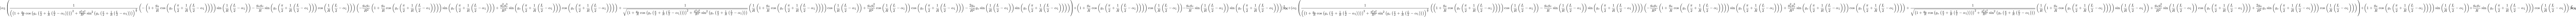

In [7]:
R1

In [8]:
R2

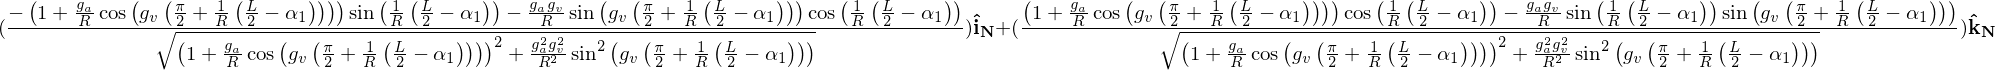

In [9]:
R3

### Draw

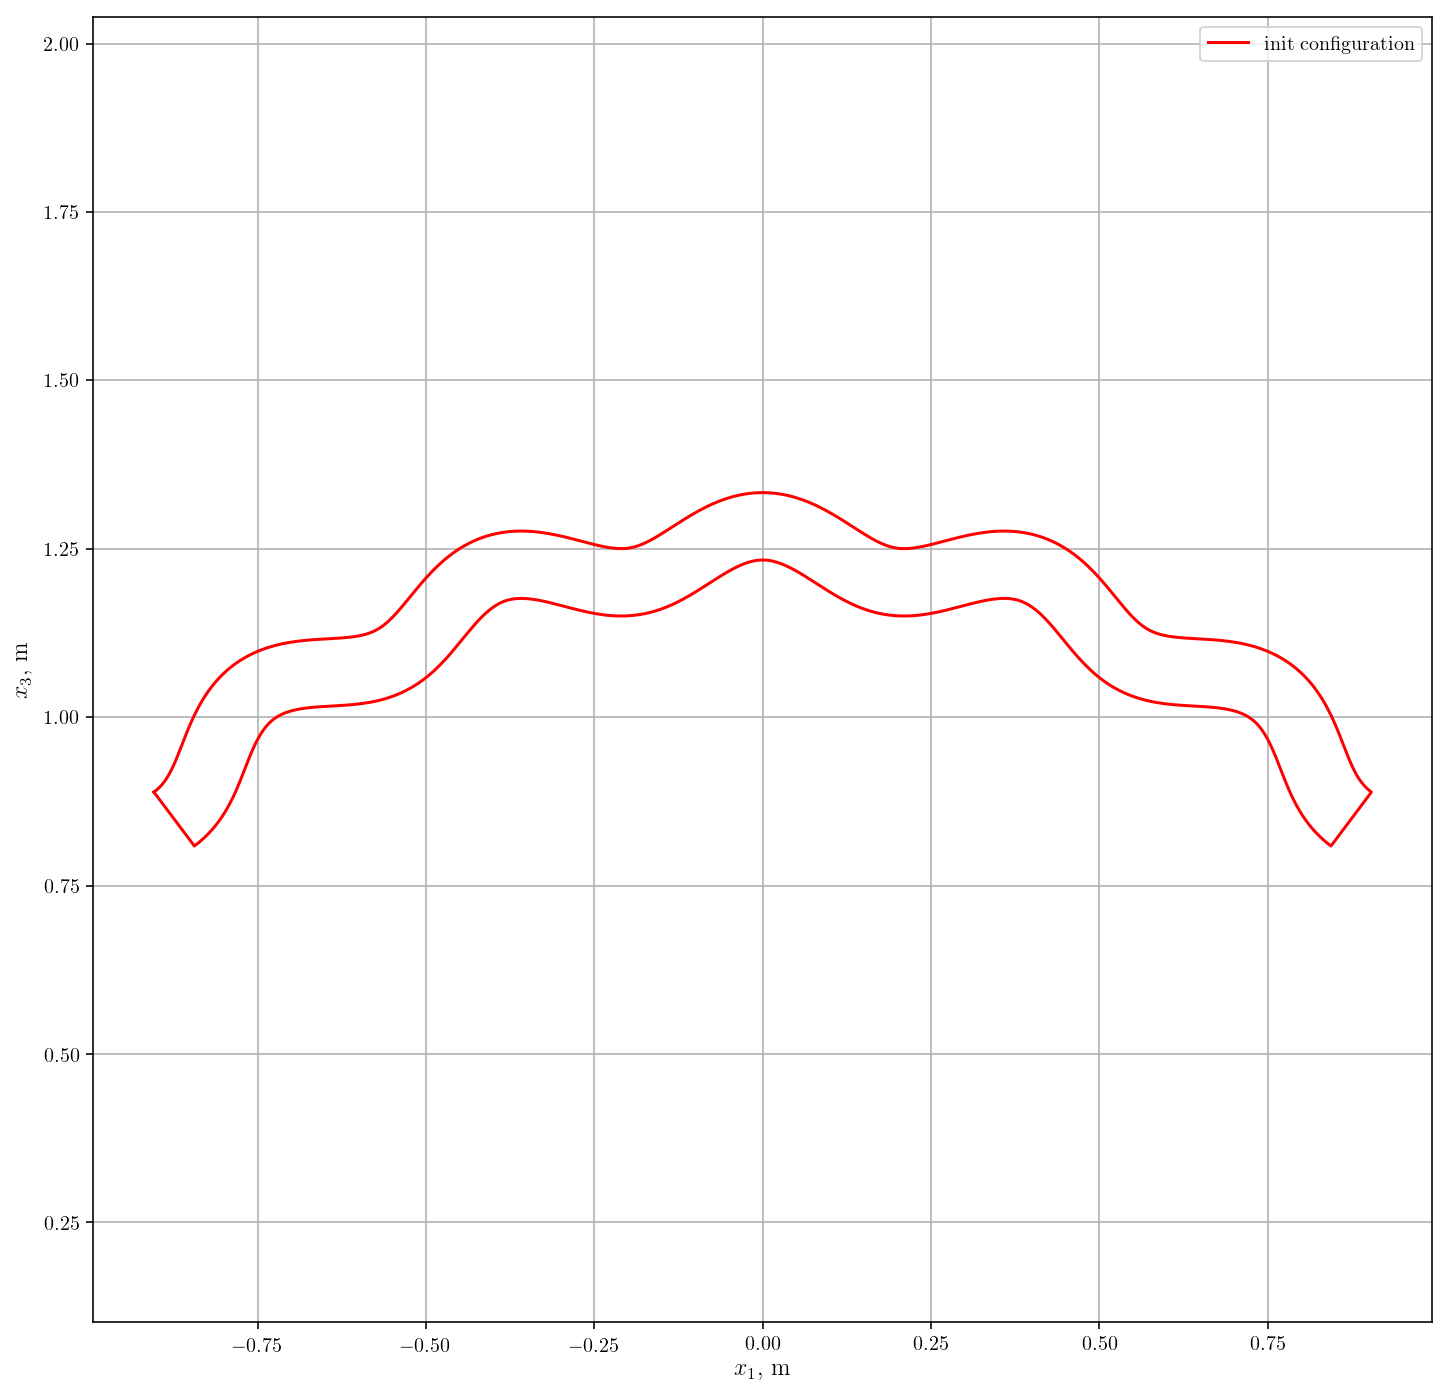

In [10]:
import plot

%aimport plot

x1 = Ralpha.dot(N.i)
x3 = Ralpha.dot(N.k)

alpha1_x = lambdify([R, L, ga, gv, alpha1, alpha3], x1, "numpy")
alpha3_z = lambdify([R, L, ga, gv, alpha1, alpha3], x3, "numpy")

R_num = 1/0.8
L_num = 2
h_num = 0.1
ga_num = h_num/3
gv_num = 20

x1_start = 0
x1_end = L_num
x3_start = -h_num/2
x3_end = h_num/2

def alpha_to_x(a1, a2, a3):
    x=alpha1_x(R_num, L_num, ga_num, gv_num, a1, a3)
    z=alpha3_z(R_num, L_num, ga_num, gv_num, a1, a3)
    return x, 0, z
    

plot.plot_init_geometry_2(x1_start, x1_end, x3_start, x3_end, alpha_to_x)

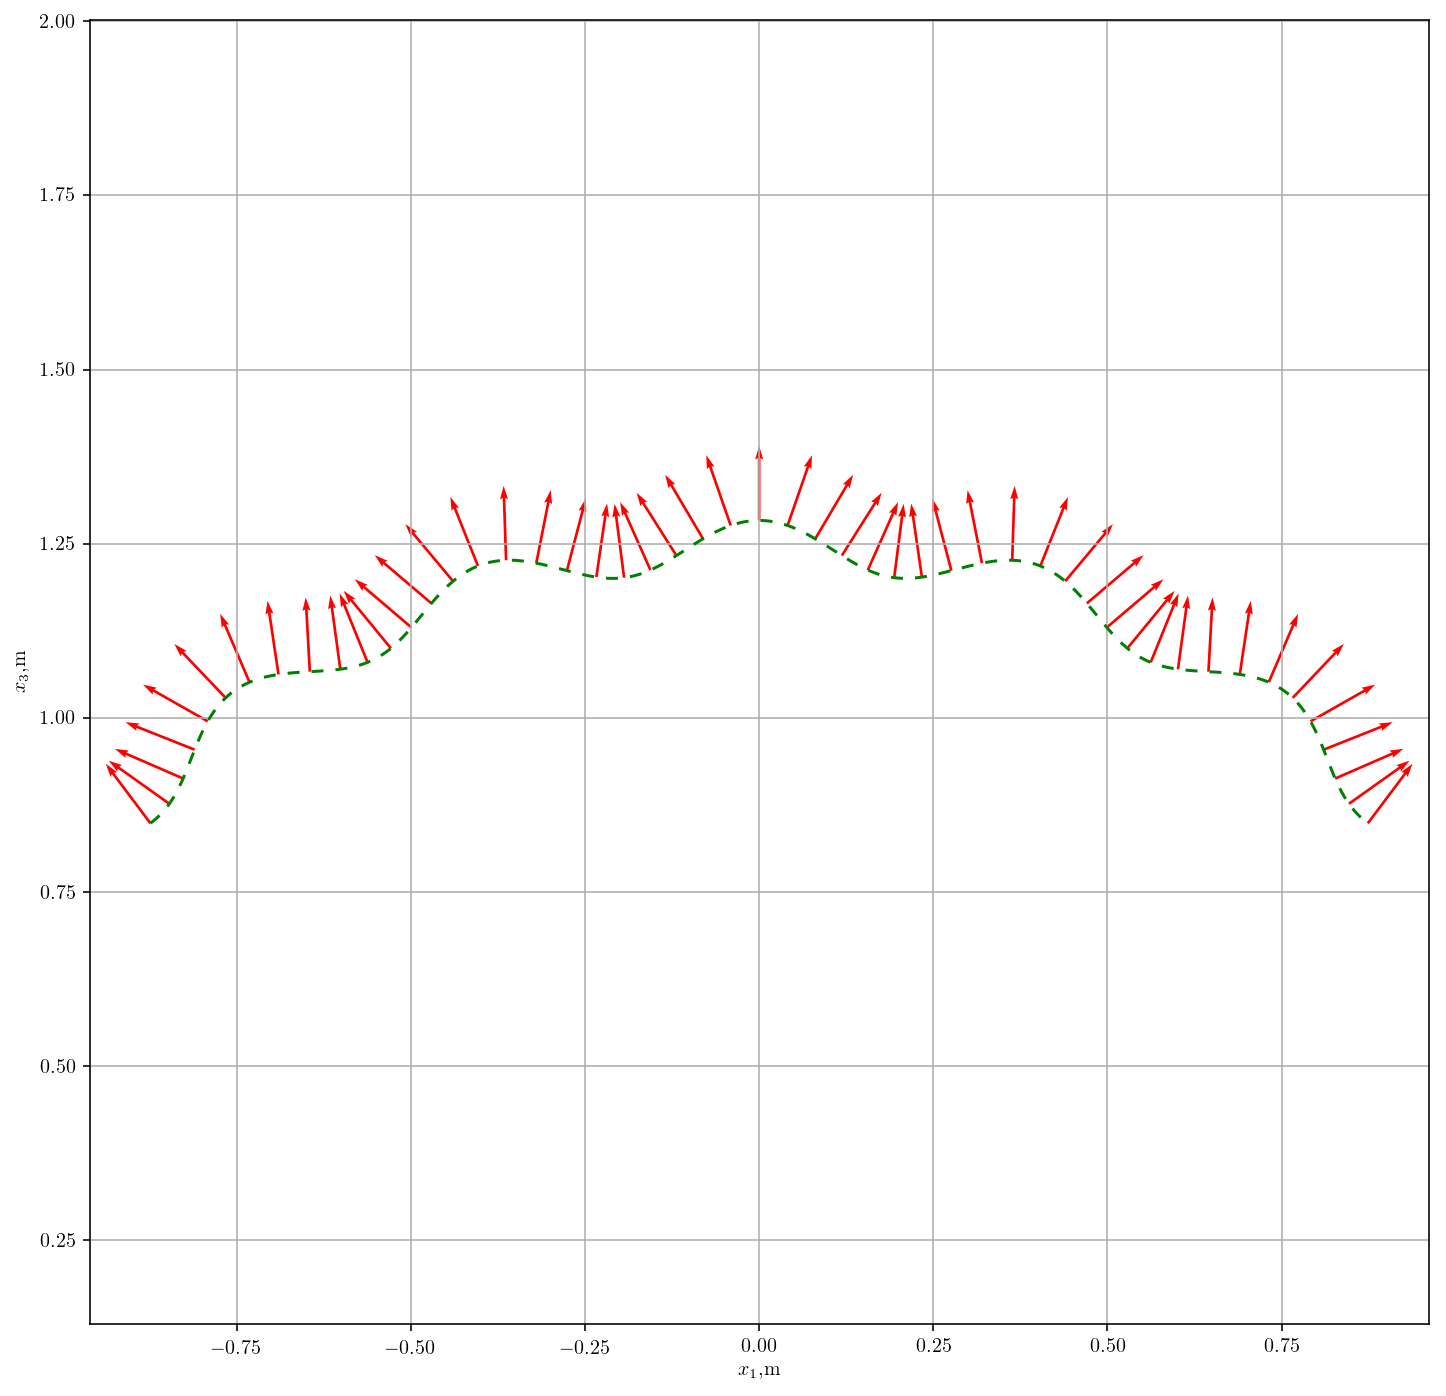

In [11]:
%aimport plot

R3_1=R3.dot(N.i)
R3_3=R3.dot(N.k)

R3_1_x = lambdify([R, L, ga, gv, alpha1, alpha3], R3_1, "numpy")
R3_3_z = lambdify([R, L, ga, gv, alpha1, alpha3], R3_3, "numpy")

def R3_to_x(a1, a2, a3):
    x=R3_1_x(R_num, L_num, ga_num, gv_num, a1, a3)
    z=R3_3_z(R_num, L_num, ga_num, gv_num, a1, a3)
    return x, 0, z

plot.plot_vectors(x1_start, x1_end, 0, alpha_to_x, R3_to_x)

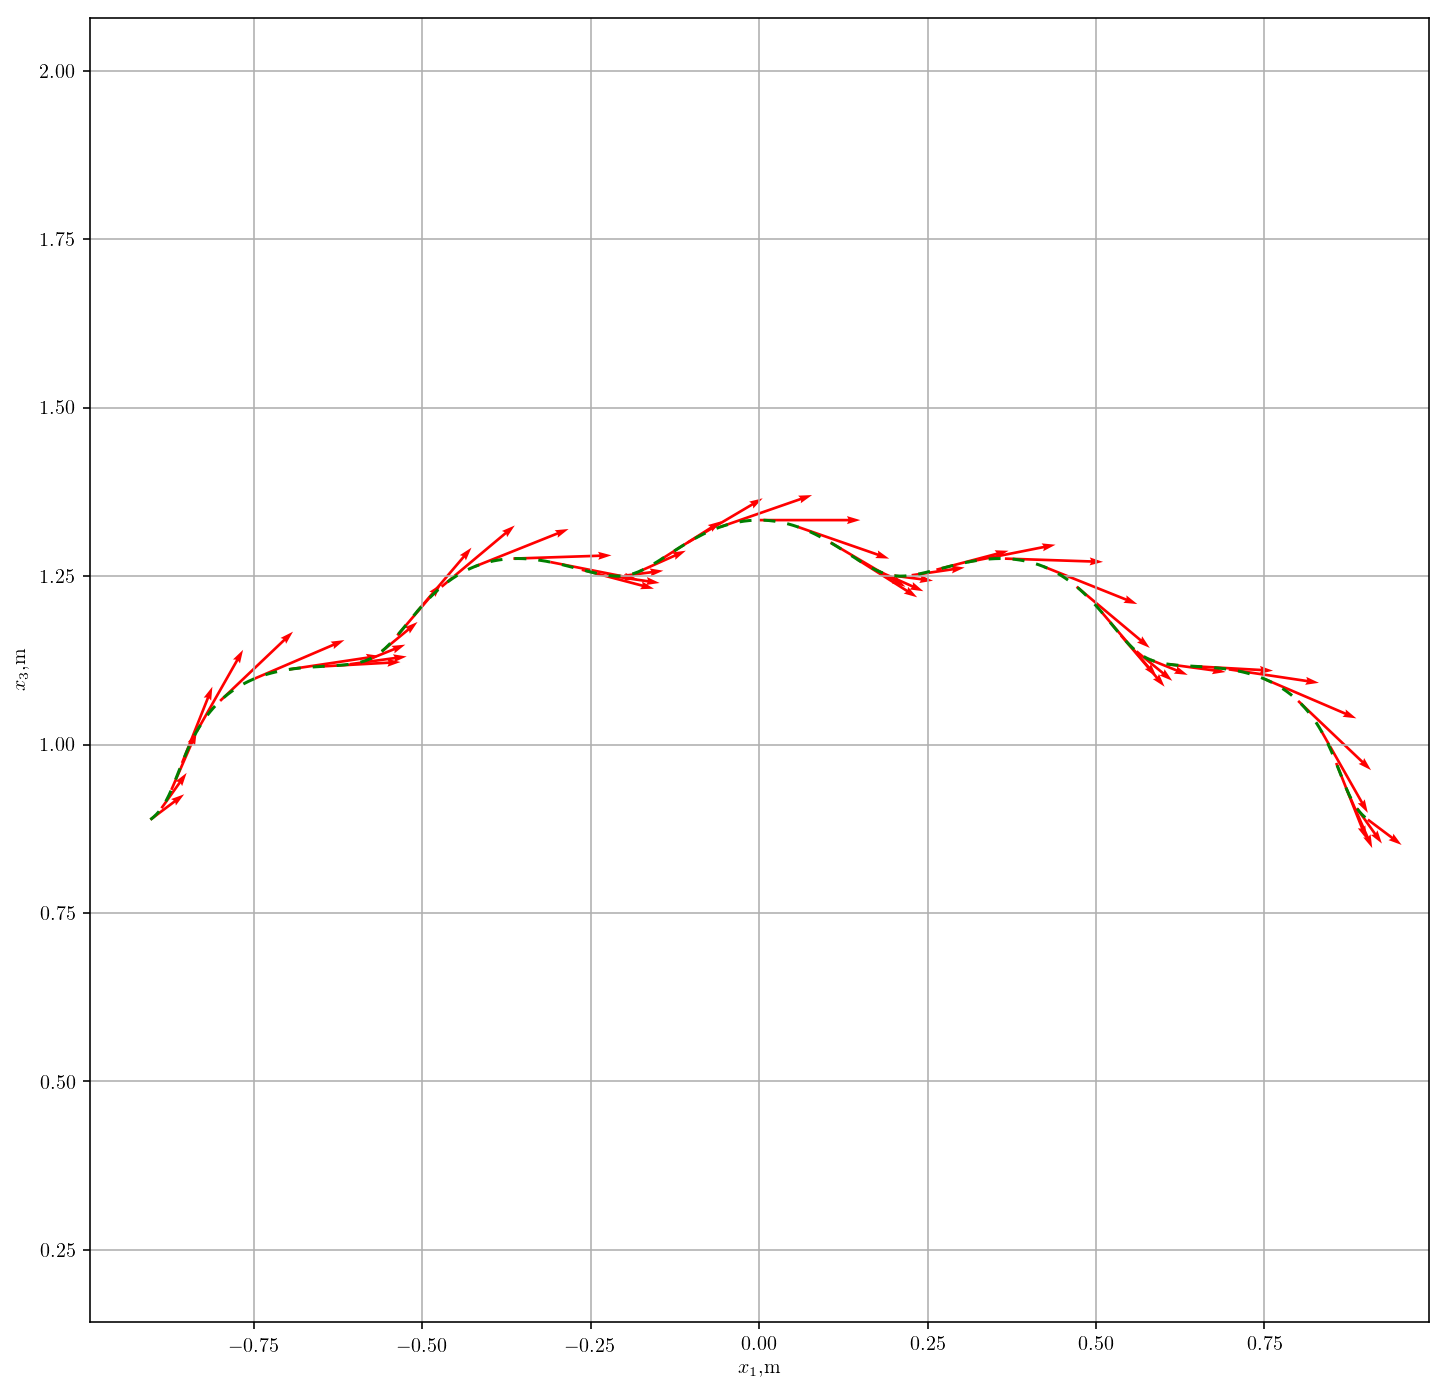

In [12]:
%aimport plot

R1_1=R1.dot(N.i)
R1_3=R1.dot(N.k)

R1_1_x = lambdify([R, L, ga, gv, alpha1, alpha3], R1_1, "numpy")
R1_3_z = lambdify([R, L, ga, gv, alpha1, alpha3], R1_3, "numpy")

def R1_to_x(a1, a2, a3):
    x=R1_1_x(R_num, L_num, ga_num, gv_num, a1, a3)
    z=R1_3_z(R_num, L_num, ga_num, gv_num, a1, a3)
    return x, 0, z

plot.plot_vectors(x1_start, x1_end, h_num/2, alpha_to_x, R1_to_x)

### Lame params

In [15]:
H1 = sqrt((alpha3*((-(1 + ga*cos(gv*(pi/2 + (L/2 - alpha1)/R))/R)*sin((L/2 - alpha1)/R) - ga*gv*sin(gv*(pi/2 + (L/2 - alpha1)/R))*cos((L/2 - alpha1)/R)/R)*(-ga*gv*(1 + ga*cos(gv*(pi/2 + (L/2 - alpha1)/R))/R)*sin(gv*(pi/2 + (L/2 - alpha1)/R))/R**2 + ga**2*gv**3*sin(gv*(pi/2 + (L/2 - alpha1)/R))*cos(gv*(pi/2 + (L/2 - alpha1)/R))/R**3)/((1 + ga*cos(gv*(pi/2 + (L/2 - alpha1)/R))/R)**2 + ga**2*gv**2*sin(gv*(pi/2 + (L/2 - alpha1)/R))**2/R**2)**(3/2) + ((1 + ga*cos(gv*(pi/2 + (L/2 - alpha1)/R))/R)*cos((L/2 - alpha1)/R)/R + ga*gv**2*cos((L/2 - alpha1)/R)*cos(gv*(pi/2 + (L/2 - alpha1)/R))/R**2 - 2*ga*gv*sin((L/2 - alpha1)/R)*sin(gv*(pi/2 + (L/2 - alpha1)/R))/R**2)/sqrt((1 + ga*cos(gv*(pi/2 + (L/2 - alpha1)/R))/R)**2 + ga**2*gv**2*sin(gv*(pi/2 + (L/2 - alpha1)/R))**2/R**2)) + (1 + ga*cos(gv*(pi/2 + (L/2 - alpha1)/R))/R)*cos((L/2 - alpha1)/R) - ga*gv*sin((L/2 - alpha1)/R)*sin(gv*(pi/2 + (L/2 - alpha1)/R))/R)**2 + (alpha3*(((1 + ga*cos(gv*(pi/2 + (L/2 - alpha1)/R))/R)*cos((L/2 - alpha1)/R) - ga*gv*sin((L/2 - alpha1)/R)*sin(gv*(pi/2 + (L/2 - alpha1)/R))/R)*(-ga*gv*(1 + ga*cos(gv*(pi/2 + (L/2 - alpha1)/R))/R)*sin(gv*(pi/2 + (L/2 - alpha1)/R))/R**2 + ga**2*gv**3*sin(gv*(pi/2 + (L/2 - alpha1)/R))*cos(gv*(pi/2 + (L/2 - alpha1)/R))/R**3)/((1 + ga*cos(gv*(pi/2 + (L/2 - alpha1)/R))/R)**2 + ga**2*gv**2*sin(gv*(pi/2 + (L/2 - alpha1)/R))**2/R**2)**(3/2) + ((1 + ga*cos(gv*(pi/2 + (L/2 - alpha1)/R))/R)*sin((L/2 - alpha1)/R)/R + ga*gv**2*sin((L/2 - alpha1)/R)*cos(gv*(pi/2 + (L/2 - alpha1)/R))/R**2 + 2*ga*gv*sin(gv*(pi/2 + (L/2 - alpha1)/R))*cos((L/2 - alpha1)/R)/R**2)/sqrt((1 + ga*cos(gv*(pi/2 + (L/2 - alpha1)/R))/R)**2 + ga**2*gv**2*sin(gv*(pi/2 + (L/2 - alpha1)/R))**2/R**2)) + (1 + ga*cos(gv*(pi/2 + (L/2 - alpha1)/R))/R)*sin((L/2 - alpha1)/R) + ga*gv*sin(gv*(pi/2 + (L/2 - alpha1)/R))*cos((L/2 - alpha1)/R)/R)**2)
H2=S(1)
H3=S(1)

H=[H1, H2, H3]
DIM=3
dH = zeros(DIM,DIM)
for i in range(DIM):
    dH[i,0]=H[i].diff(alpha1)
    dH[i,1]=H[i].diff(alpha2)
    dH[i,2]=H[i].diff(alpha3)
    

### Metric tensor

${\displaystyle \hat{G}=\sum_{i,j} g^{ij}\vec{R}_i\vec{R}_j}$

In [16]:
%aimport geom_util
G_up = getMetricTensorUpLame(H1, H2, H3)

${\displaystyle \hat{G}=\sum_{i,j} g_{ij}\vec{R}^i\vec{R}^j}$

In [17]:
G_down = getMetricTensorDownLame(H1, H2, H3)

### Christoffel symbols

In [19]:
DIM=3

G_down_diff = MutableDenseNDimArray.zeros(DIM, DIM, DIM)
for i in range(DIM):
    for j in range(DIM):
        for k in range(DIM):
                
            G_down_diff[i,i,k]=2*H[i]*dH[i,k]
                

GK = getChristoffelSymbols2(G_up, G_down_diff, (alpha1, alpha2, alpha3))

### Gradient of vector

$ 
\left( 
\begin{array}{c} 
\nabla_1 u_1 \\ \nabla_2 u_1 \\ \nabla_3 u_1 \\
\nabla_1 u_2 \\ \nabla_2 u_2 \\ \nabla_3 u_2 \\
\nabla_1 u_3 \\ \nabla_2 u_3 \\ \nabla_3 u_3 \\
\end{array} 
\right)
=  
B \cdot
\left( 
\begin{array}{c} 
u_1 \\
\frac { \partial u_1 } { \partial \alpha_1} \\
\frac { \partial u_1 } { \partial \alpha_2} \\
\frac { \partial u_1 } { \partial \alpha_3} \\
u_2 \\
\frac { \partial u_2 } { \partial \alpha_1} \\
\frac { \partial u_2 } { \partial \alpha_2} \\
\frac { \partial u_2 } { \partial \alpha_3} \\
u_3 \\
\frac { \partial u_3 } { \partial \alpha_1} \\
\frac { \partial u_3 } { \partial \alpha_2} \\
\frac { \partial u_3 } { \partial \alpha_3} \\
\end{array} 
\right) 
= B \cdot D \cdot
\left( 
\begin{array}{c} 
u^1 \\
\frac { \partial u^1 } { \partial \alpha_1} \\
\frac { \partial u^1 } { \partial \alpha_2} \\
\frac { \partial u^1 } { \partial \alpha_3} \\
u^2 \\
\frac { \partial u^2 } { \partial \alpha_1} \\
\frac { \partial u^2 } { \partial \alpha_2} \\
\frac { \partial u^2 } { \partial \alpha_3} \\
u^3 \\
\frac { \partial u^3 } { \partial \alpha_1} \\
\frac { \partial u^3 } { \partial \alpha_2} \\
\frac { \partial u^3 } { \partial \alpha_3} \\
\end{array} 
\right) 
$

In [21]:
def row_index_to_i_j_grad(i_row):
    return i_row // 3, i_row % 3
        

B = zeros(9, 12)
B[0,1] = S(1)
B[1,2] = S(1)

B[2,3] = S(1)

B[3,5] = S(1)
B[4,6] = S(1)
B[5,7] = S(1)

B[6,9] = S(1)
B[7,10] = S(1)
B[8,11] = S(1)

for row_index in range(9):
    i,j=row_index_to_i_j_grad(row_index)
    B[row_index, 0] = -GK[i,j,0]
    B[row_index, 4] = -GK[i,j,1]
    B[row_index, 8] = -GK[i,j,2]


### Strain tensor

$ 
\left( 
\begin{array}{c} 
\varepsilon_{11} \\ 
\varepsilon_{22} \\ 
\varepsilon_{33} \\ 
2\varepsilon_{12} \\ 
2\varepsilon_{13} \\ 
2\varepsilon_{23} \\ 
\end{array} 
\right)
=  
\left(E + E_{NL} \left( \nabla \vec{u} \right) \right) \cdot 
\left( 
\begin{array}{c} 
\nabla_1 u_1 \\ \nabla_2 u_1 \\ \nabla_3 u_1 \\
\nabla_1 u_2 \\ \nabla_2 u_2 \\ \nabla_3 u_2 \\
\nabla_1 u_3 \\ \nabla_2 u_3 \\ \nabla_3 u_3 \\
\end{array} 
\right)$

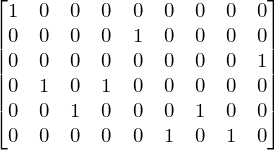

In [22]:
E=zeros(6,9)
E[0,0]=1
E[1,4]=1
E[2,8]=1
E[3,1]=1
E[3,3]=1
E[4,2]=1
E[4,6]=1
E[5,5]=1
E[5,7]=1
E

In [23]:
def E_NonLinear(grad_u):
    N = 3

    du = zeros(N, N)

    #    print("===Deformations===")

    for i in range(N):
        for j in range(N):
            index = i*N+j
            du[j,i] = grad_u[index]

    #    print("========")
    
    I = eye(3)

    a_values = S(1)/S(2) * du * G_up


    E_NL = zeros(6,9)
    E_NL[0,0] = a_values[0,0]
    E_NL[0,3] = a_values[0,1]
    E_NL[0,6] = a_values[0,2]

    E_NL[1,1] = a_values[1,0]
    E_NL[1,4] = a_values[1,1]
    E_NL[1,7] = a_values[1,2]

    E_NL[2,2] = a_values[2,0]
    E_NL[2,5] = a_values[2,1]
    E_NL[2,8] = a_values[2,2]

    E_NL[3,1] = 2*a_values[0,0]
    E_NL[3,4] = 2*a_values[0,1]
    E_NL[3,7] = 2*a_values[0,2]

    E_NL[4,0] = 2*a_values[2,0]
    E_NL[4,3] = 2*a_values[2,1]
    E_NL[4,6] = 2*a_values[2,2]

    E_NL[5,2] = 2*a_values[1,0]
    E_NL[5,5] = 2*a_values[1,1]
    E_NL[5,8] = 2*a_values[1,2]


    return E_NL


%aimport geom_util
u=getUHat3DPlane(alpha1, alpha2, alpha3)


# u=getUHatU3Main(alpha1, alpha2, alpha3)

gradu=B*u


E_NL = E_NonLinear(gradu)*B



### Physical coordinates

$u_i=u_{[i]} H_i$

In [24]:
P=zeros(12,12)
P[0,0]=H[0]
P[1,0]=dH[0,0]
P[1,1]=H[0]
P[2,0]=dH[0,1]
P[2,2]=H[0]
P[3,0]=dH[0,2]
P[3,3]=H[0]

P[4,4]=H[1]
P[5,4]=dH[1,0]
P[5,5]=H[1]
P[6,4]=dH[1,1]
P[6,6]=H[1]
P[7,4]=dH[1,2]
P[7,7]=H[1]

P[8,8]=H[2]
P[9,8]=dH[2,0]
P[9,9]=H[2]
P[10,8]=dH[2,1]
P[10,10]=H[2]
P[11,8]=dH[2,2]
P[11,11]=H[2]
P=simplify(P)
P

KeyboardInterrupt: 

In [ ]:
B_P = zeros(9,9)

for i in range(3):
    for j in range(3):
        
        row_index = i*3+j
        
        B_P[row_index, row_index] = 1/(H[i]*H[j])
        

Grad_U_P = simplify(B_P*B*P)
Grad_U_P

In [ ]:
StrainL=simplify(E*Grad_U_P)
StrainL

In [ ]:
%aimport geom_util


u=getUHatU3Main(alpha1, alpha2, alpha3)

gradup=Grad_U_P*u


E_NLp = E_NonLinear(gradup)*Grad_U_P


simplify(E_NLp)

### Tymoshenko theory

$u_1 \left( \alpha_1, \alpha_2, \alpha_3 \right)=u\left( \alpha_1 \right)+\alpha_3\gamma \left( \alpha_1 \right) $

$u_2 \left( \alpha_1, \alpha_2, \alpha_3 \right)=0 $

$u_3 \left( \alpha_1, \alpha_2, \alpha_3 \right)=w\left( \alpha_1 \right) $

$ \left( 
\begin{array}{c} 
u_1 \\
\frac { \partial u_1 } { \partial \alpha_1} \\
\frac { \partial u_1 } { \partial \alpha_2} \\
\frac { \partial u_1 } { \partial \alpha_3} \\
u_2 \\
\frac { \partial u_2 } { \partial \alpha_1} \\
\frac { \partial u_2 } { \partial \alpha_2} \\
\frac { \partial u_2 } { \partial \alpha_3} \\
u_3 \\
\frac { \partial u_3 } { \partial \alpha_1} \\
\frac { \partial u_3 } { \partial \alpha_2} \\
\frac { \partial u_3 } { \partial \alpha_3} \\
\end{array} 
\right) = T \cdot 
\left( 
\begin{array}{c} 
u \\
\frac { \partial u } { \partial \alpha_1} \\
\gamma \\
\frac { \partial \gamma } { \partial \alpha_1} \\
w \\
\frac { \partial w } { \partial \alpha_1} \\
\end{array} 
\right) $

In [ ]:
T=zeros(12,6)
T[0,0]=1
T[0,2]=alpha3
T[1,1]=1
T[1,3]=alpha3
T[3,2]=1

T[8,4]=1
T[9,5]=1
T

In [ ]:
D_p_T = StrainL*T
simplify(D_p_T)

In [ ]:
u = Function("u")
t = Function("theta")
w = Function("w")

u1=u(alpha1)+alpha3*t(alpha1)
u3=w(alpha1)

gu = zeros(12,1) 
gu[0] = u1
gu[1] = u1.diff(alpha1)
gu[3] = u1.diff(alpha3)


gu[8] = u3
gu[9] = u3.diff(alpha1)


gradup=Grad_U_P*gu

# o20=(K*u(alpha1)-w(alpha1).diff(alpha1)+t(alpha1))/2
# o21=K*t(alpha1)
# O=1/2*o20*o20+alpha3*o20*o21-alpha3*K/2*o20*o20
# O=expand(O)
# O=collect(O,alpha3)
# simplify(O)

StrainNL = E_NonLinear(gradup)*gradup
simplify(StrainNL)

### Square theory

$u^1 \left( \alpha_1, \alpha_2, \alpha_3 \right)=u_{10}\left( \alpha_1 \right)p_0\left( \alpha_3 \right)+u_{11}\left( \alpha_1 \right)p_1\left( \alpha_3 \right)+u_{12}\left( \alpha_1 \right)p_2\left( \alpha_3 \right) $

$u^2 \left( \alpha_1, \alpha_2, \alpha_3 \right)=0 $

$u^3 \left( \alpha_1, \alpha_2, \alpha_3 \right)=u_{30}\left( \alpha_1 \right)p_0\left( \alpha_3 \right)+u_{31}\left( \alpha_1 \right)p_1\left( \alpha_3 \right)+u_{32}\left( \alpha_1 \right)p_2\left( \alpha_3 \right) $

$ \left( 
\begin{array}{c} 
u^1 \\
\frac { \partial u^1 } { \partial \alpha_1} \\
\frac { \partial u^1 } { \partial \alpha_2} \\
\frac { \partial u^1 } { \partial \alpha_3} \\
u^2 \\
\frac { \partial u^2 } { \partial \alpha_1} \\
\frac { \partial u^2 } { \partial \alpha_2} \\
\frac { \partial u^2 } { \partial \alpha_3} \\
u^3 \\
\frac { \partial u^3 } { \partial \alpha_1} \\
\frac { \partial u^3 } { \partial \alpha_2} \\
\frac { \partial u^3 } { \partial \alpha_3} \\
\end{array} 
\right) = L \cdot 
\left( 
\begin{array}{c} 
u_{10} \\
\frac { \partial u_{10} } { \partial \alpha_1} \\
u_{11} \\
\frac { \partial u_{11} } { \partial \alpha_1} \\
u_{12} \\
\frac { \partial u_{12} } { \partial \alpha_1} \\
u_{30} \\
\frac { \partial u_{30} } { \partial \alpha_1} \\
u_{31} \\
\frac { \partial u_{31} } { \partial \alpha_1} \\
u_{32} \\
\frac { \partial u_{32} } { \partial \alpha_1} \\
\end{array} 
\right) $

In [ ]:
L=zeros(12,12)
h=Symbol('h')
p0=1/2-alpha3/h
p1=1/2+alpha3/h
p2=1-(2*alpha3/h)**2

L[0,0]=p0
L[0,2]=p1
L[0,4]=p2

L[1,1]=p0
L[1,3]=p1
L[1,5]=p2

L[3,0]=p0.diff(alpha3)
L[3,2]=p1.diff(alpha3)
L[3,4]=p2.diff(alpha3)

L[8,6]=p0
L[8,8]=p1
L[8,10]=p2

L[9,7]=p0
L[9,9]=p1
L[9,11]=p2

L[11,6]=p0.diff(alpha3)
L[11,8]=p1.diff(alpha3)
L[11,10]=p2.diff(alpha3)

L

In [ ]:
D_p_L = StrainL*L
simplify(D_p_L)

In [ ]:
h = 0.5
exp=(0.5-alpha3/h)*(1-(2*alpha3/h)**2)#/(1+alpha3*0.8)
p02=integrate(exp, (alpha3, -h/2, h/2))
integral = expand(simplify(p02))
integral

## Mass matrix

In [ ]:
rho=Symbol('rho')
B_h=zeros(3,12)
B_h[0,0]=1
B_h[1,4]=1
B_h[2,8]=1
M=simplify(rho*P.T*B_h.T*G_up*B_h*P)
M

In [ ]:
M_p = L.T*M*L*(1+alpha3/R)
mass_matr = simplify(integrate(M_p, (alpha3, -h/2, h/2)))
mass_matr